In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("./file.csv", header=None)

In [25]:
df.rename(columns={0: 'centerX'}, inplace=True)
df.rename(columns={1: 'centerY'}, inplace=True)
df.rename(columns={2: 'radius'}, inplace=True)

In [26]:
df

,centerX,centerY,radius
0,739.93,425.80,11.9090
1,775.53,426.53,9.9104
2,842.56,427.87,11.9820
3,883.60,428.77,10.2250
4,924.55,429.67,12.0320
...,...,...,...
70,1652.30,527.25,11.4740
71,1694.60,528.01,10.6980
72,1736.00,530.73,10.4980
73,1801.80,530.69,9.8707


In [27]:
import cv2

In [28]:
bolt_holes_info = df

In [29]:
# bolt_holes_info['centerX'] = cX_lst
# bolt_holes_info['centerY'] = cY_lst
# bolt_holes_info['radius'] = radius_lst

In [30]:
# bolt_holes_info['sum'] = bolt_holes_info['centerX'] + bolt_holes_info['centerY']

In [31]:
# bolt_holes_info = bolt_holes_info.sort_values(by=['sum'])

In [32]:
# bolt_holes_info

In [33]:
# condition = (bolt_holes_info['centerX'] > bolt_holes_info['centerX'].shift(1)) & (bolt_holes_info['centerY'] < bolt_holes_info['centerY'].shift(1))

In [34]:
# one_row_bolts = bolt_holes_info[condition]

In [35]:
import numpy as np

In [36]:
# one_row_bolts = bolt_holes_info[:25].sort_values(by=['centerY'])
# two_row_bolts = bolt_holes_info[25:50].sort_values(by=['centerX'])
# three_row_bolts = bolt_holes_info[50:].sort_values(by=['centerX'])

In [37]:
one_row_bolts = bolt_holes_info[:25]

In [38]:
one_row_bolts

,centerX,centerY,radius
0,739.93,425.80,11.9090
1,775.53,426.53,9.9104
2,842.56,427.87,11.9820
3,883.60,428.77,10.2250
4,924.55,429.67,12.0320
5,964.56,430.49,10.6520
6,1005.40,431.52,10.3170
7,1087.70,433.06,10.3580
8,1128.50,434.00,10.6270
9,1169.10,434.93,10.2680


In [39]:
radius = bolt_holes_info['radius'].mean()

In [40]:
radius

11.192758666666668

In [41]:
import matplotlib.pyplot as plt
import cv2

In [42]:
img = np.zeros((2000, 2000, 3), np.uint8)

In [43]:
for i in range(len(one_row_bolts)):
    centerX = int(one_row_bolts['centerX'].iloc[i])
    centerY = int(one_row_bolts['centerY'].iloc[i])
    radius = int(radius)
    
    img = cv2.circle(img, (centerX, centerY), radius, (255, 255, 0), 3)
    

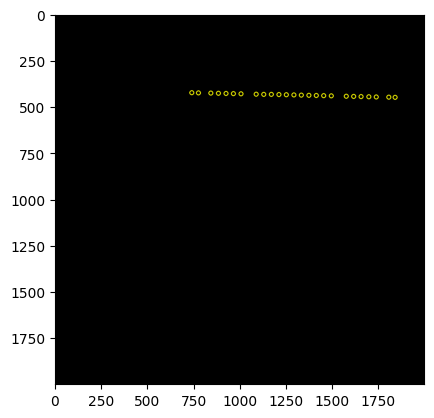

In [44]:
plt.imshow(img)
plt.show()

In [45]:
!pip3 install shapely

In [46]:
from shapely.geometry import LineString
from shapely.geometry import Point

In [47]:
x1 = one_row_bolts['centerX'].iloc[0]
y1 = one_row_bolts['centerY'].iloc[0]

In [48]:
x2 = one_row_bolts['centerX'].iloc[-1]
y2 = one_row_bolts['centerY'].iloc[-1]

In [49]:
line = LineString([(x1, y1), (x2, y2)])

In [50]:
p1 = Point(x1, y1)

In [51]:
c1 = p1.buffer(radius).boundary

In [52]:
i = c1.intersection(line)

In [53]:
len(i.xy)

2

In [54]:
found_x = int(i.xy[0][0])

In [55]:
found_y = int(i.xy[1][0])

In [56]:
img = cv2.circle(img, (found_x, found_y), 1, (255, 0, 0), 3)

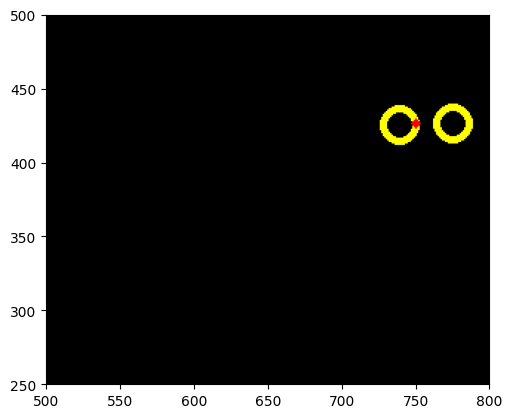

In [57]:
plt.imshow(img)
plt.xlim(500, 800)
plt.ylim(250, 500)
plt.show()

In [58]:
img = np.zeros((2000, 2000, 3), np.uint8)

In [59]:
for i in range(len(bolt_holes_info)):
    centerX = int(bolt_holes_info['centerX'].iloc[i])
    centerY = int(bolt_holes_info['centerY'].iloc[i])
    radius = int(radius)
    
    img = cv2.circle(img, (centerX, centerY), radius, (255, 255, 255), 3)

In [60]:
found_x1_l = []
found_y1_l = []

found_x2_l = []
found_y2_l = []

In [61]:
for i in range(0, len(bolt_holes_info) - 1):
    x1 = bolt_holes_info['centerX'].iloc[i]
    y1 = bolt_holes_info['centerY'].iloc[i]

    x2 = bolt_holes_info['centerX'].iloc[i + 1]
    y2 = bolt_holes_info['centerY'].iloc[i + 1]
    
    p1 = Point(x1, y1)
    p2 = Point(x2, y2)
    
    c1 = p1.buffer(radius).boundary
    c2 = p2.buffer(radius).boundary

    line = LineString([(x1, y1), (x2, y2)])

    i1 = c1.intersection(line)
    i2 = c2.intersection(line)

    print(i2)

    found_x1 = int(i1.xy[0][0])
    found_y1 = int(i1.xy[1][0])

    found_x1_l.append(found_x1)
    found_y1_l.append(found_y1)

    found_x2 = int(i2.xy[0][0])
    found_y2 = int(i2.xy[1][0])

    found_x2_l.append(found_x2)
    found_y2_l.append(found_y2)

    img = cv2.circle(img, (found_x1, found_y1), 2, (0, 255, 0), 3)
    img = cv2.circle(img, (found_x2, found_y2), 2, (255, 0, 0), 3)
    

POINT (764.5410699889062 426.3046651992107)
POINT (831.5707924704982 427.65031421617886)
POINT (872.6118380215518 428.5290315355603)
POINT (913.5618640111202 429.4285025057389)
POINT (953.5710641958177 430.2647831202342)
POINT (994.4136121064247 431.24291920836475)
POINT (1076.7101026065477 432.8543567194907)
POINT (1117.5124362091162 433.74685514795516)
POINT (1158.1123645999917 434.67831278517224)
POINT (1199.1081657657865 435.38378201889725)
POINT (1239.4067005728218 435.91360670685884)
POINT (1280.0253639201753 437.4437055440279)
POINT (1320.7092864224655 438.47097052815053)
POINT (1361.0052271472985 438.9435989723932)
POINT (1401.520642985064 440.1798023858481)
POINT (1441.9158945854183 441.4664582811052)
POINT (1482.0099633503937 442.3271913436232)
POINT (1563.0145913082 444.42298709833284)
POINT (1603.6115677227504 445.3545335940589)
POINT (1643.511770448098 446.22040702480814)
POINT (1685.5087423044904 446.96204630397744)
POINT (1725.5125498573907 447.8145417841843)
POINT (1793

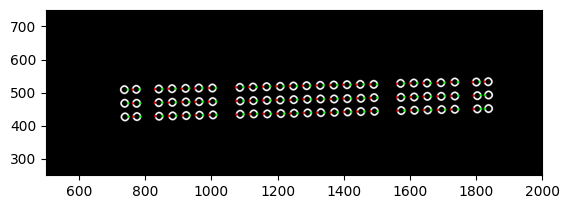

In [62]:
plt.imshow(img)
plt.xlim(500, 2000)
plt.ylim(250, 750)
plt.show()

In [63]:
len(found_x1_l)

74

In [64]:
len(found_x2_l)

74

In [65]:
found_coordinates = pd.DataFrame(columns = ['found_x1', 'found_y1', 'found_x2', 'found_y2'])

In [66]:
found_coordinates['found_x1'] = found_x1_l
found_coordinates['found_y1'] = found_y1_l

found_coordinates['found_x2'] = found_x2_l
found_coordinates['found_y2'] = found_y2_l

In [67]:
found_coordinates

,found_x1,found_y1,found_x2,found_y2
0,750,426,764,426
1,786,426,831,427
2,853,428,872,428
3,894,429,913,429
4,935,429,953,430
...,...,...,...,...
69,1623,527,1641,527
70,1663,527,1683,527
71,1705,528,1725,530
72,1746,530,1790,530


In [68]:
found_coordinates.to_csv("./found_coordinates.csv")